In [131]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import os
import pandas as pd
from collections import Counter
%matplotlib inline

import re
import sys

from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

np.random.seed(1) # set a seed so that the results are consistent

## Model Log Analysis

In [230]:
# import all relevant log files
baseline_path = "/Users/weiwzhang/arena/dialog_paraphrase/code/logs/baseline/baseline_logs"
transformer_bow = "/Users/weiwzhang/arena/dialog_paraphrase/code/logs/transformer_bow_dim500/transformer_bow_dim500_logs"
transformer_bow_w2v = "/Users/weiwzhang/arena/dialog_paraphrase/code/logs/transformer_bow_w2v_dim500/transformer_bow_w2v_dim500_logs"
transformer_bow_w2v_beam = "/Users/weiwzhang/arena/dialog_paraphrase/code/logs/transformer_bow_w2v_dim500_beam/transformer_bow_w2v_dim500_beam_logs"
transformer_bow_w2v_residual = "/Users/weiwzhang/arena/dialog_paraphrase/code/logs/transformer_bow_w2v_dim500_dropout/transformer_bow_w2v_dim500_dropout_logs"
transformer_bow_w2v_dim300 = "/Users/weiwzhang/arena/dialog_paraphrase/code/logs/transformer_bow_w2v_dim300/transformer_bow_w2v_dim300_logs"
transformer_w2v_dim300 = "/Users/weiwzhang/arena/dialog_paraphrase/code/logs/transformer_w2v_dim300/transformer_w2v_dim300_logs"

In [249]:
# regex for all metrics
loss = r'loss: (\d+).(\d){4}'
enc_loss = r'enc_loss: (-*)(\d+).(\d){4}'
dec_loss = r'dec_loss: (-*)(\d+).(\d){4}'
precision_confident = r'precision_confident: (\d+).(\d+)'
recall_confident = r'recall_confident: (\d+).(\d+)'

# dimension for transformer_bow_w2v_residual is smaller because this log is truncated
transformer_paths = [transformer_bow, transformer_bow_w2v, transformer_bow_w2v_beam, transformer_bow_w2v_dim300, transformer_w2v_dim300]
transformer_file_titlelen = [27, 31, 35, 31, 27]


In [226]:
# data analysis helpers
def create_training_metric_df(file_path, regex_pattern, last_epoch_ind, window):
    counter = 0
    metrics = []
    curr_epoch_metrics = []
    with open(file_path, "r") as log:
        for line in log:
            match = re.search(regex_pattern, line)
            if match: 
                curr_metric = float(match.group(0).split()[1])
                # zoom in on first x numbers in an epoch
                if counter < window:
                    curr_epoch_metrics.append(curr_metric)
                if counter == last_epoch_ind:
                    # start tracking next epoch
                    metrics.append(curr_epoch_metrics)
                    curr_epoch_metrics = []
                    counter = 0
                else:
                    counter += 1
    return pd.DataFrame(metrics).T

### Losses

Text(0, 0.5, 'Loss')

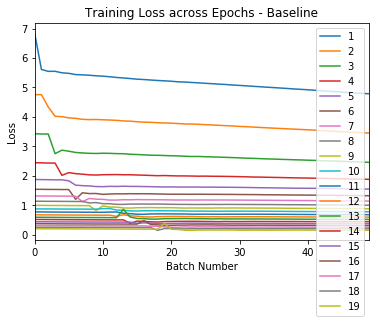

In [235]:
baseline_loss_df = create_training_metric_df(baseline_path, loss, 50, 50)
# print(loss_df)
baseline_loss_df.drop(columns=[0], inplace=True)
baseline_loss_graph = baseline_loss_df.plot()
baseline_loss_graph.set_title("Training Loss across Epochs - Baseline")
baseline_loss_graph.set_xlabel("Batch Number")
baseline_loss_graph.set_ylabel("Loss")

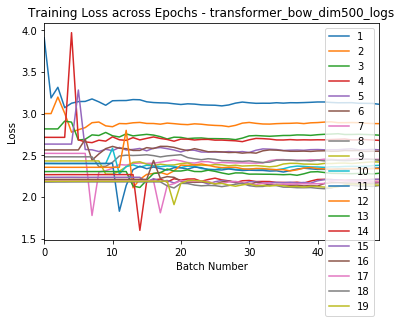

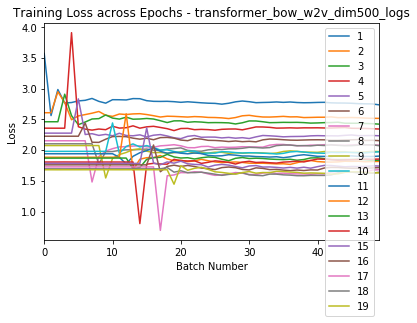

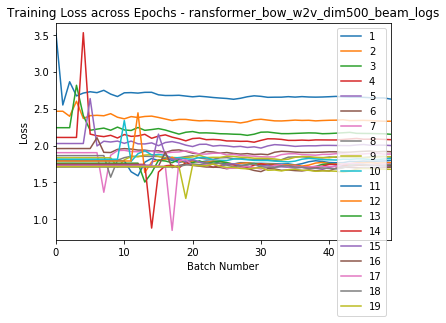

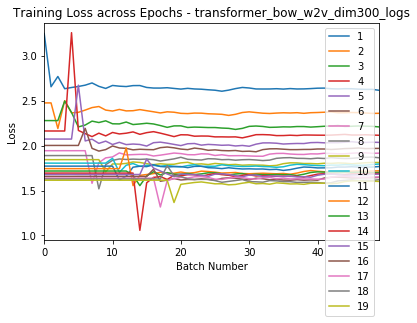

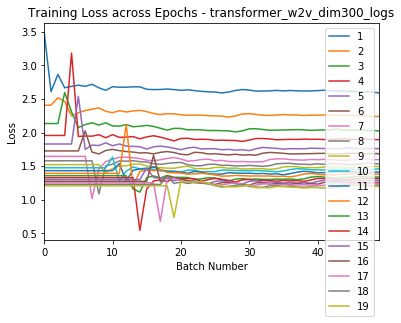

In [250]:
for i in range(len(transformer_paths)):
    file_path, file_title_len = transformer_paths[i], transformer_file_titlelen[i]
    last_epoch_ind = 1000
    window = 50
    loss_df = create_training_metric_df(file_path, loss, last_epoch_ind, window)
    loss_df.drop(columns=[0], inplace=True)
    loss_graph = loss_df.plot()
    loss_graph.set_title("Training Loss across Epochs - " + file_path[len(file_path) - file_title_len :])
    loss_graph.set_xlabel("Batch Number")
    loss_graph.set_ylabel("Loss")

### Precision & Recall

Text(0, 0.5, 'Precision')

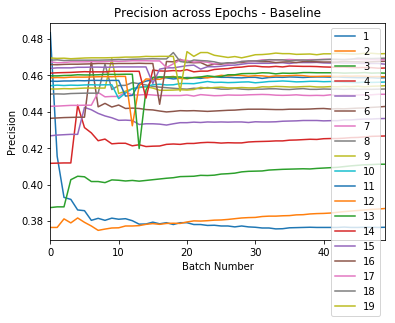

In [251]:
# baseline precision trend

baseline_precision_df = create_training_metric_df(baseline_path, precision_confident, 50, 50)
# print(loss_df)
baseline_precision_df.drop(columns=[0], inplace=True)
baseline_precision_graph = baseline_precision_df.plot()
baseline_precision_graph.set_title("Precision across Epochs - Baseline")
baseline_precision_graph.set_xlabel("Batch Number")
baseline_precision_graph.set_ylabel("Precision")

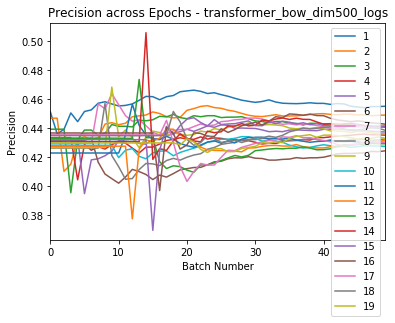

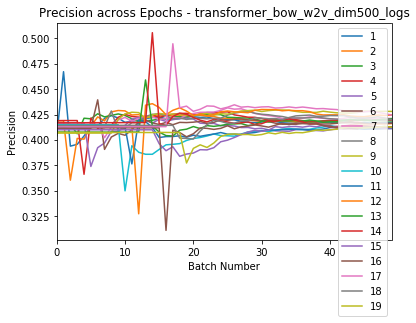

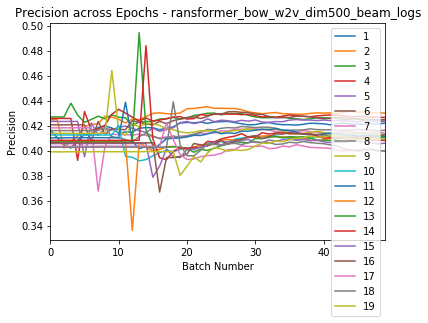

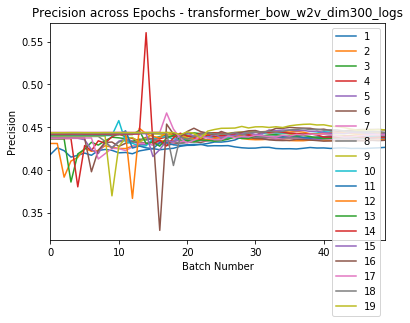

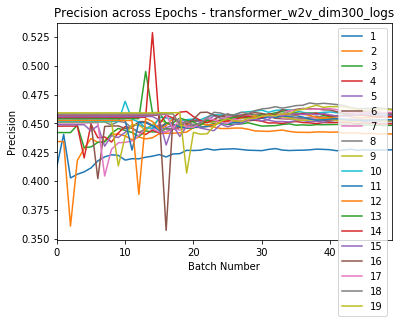

In [253]:
# transformer precision trends

for i in range(len(transformer_paths)):
    file_path, file_title_len = transformer_paths[i], transformer_file_titlelen[i]
    last_epoch_ind = 1000
    window = 50
    precision_df = create_training_metric_df(file_path, precision_confident, last_epoch_ind, window)
    precision_df.drop(columns=[0], inplace=True)
    precision_graph = precision_df.plot()
    precision_graph.set_title("Precision across Epochs - " + file_path[len(file_path) - file_title_len :])
    precision_graph.set_xlabel("Batch Number")
    precision_graph.set_ylabel("Precision")

Text(0, 0.5, 'Recall')

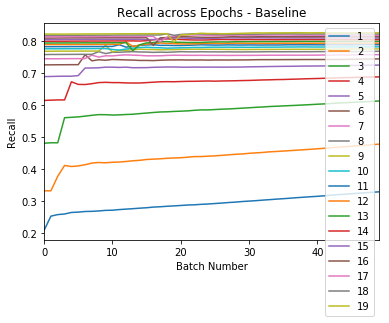

In [255]:
# baseline recall trend

baseline_recall_df = create_training_metric_df(baseline_path, recall_confident, 50, 50)
# print(loss_df)
baseline_recall_df.drop(columns=[0], inplace=True)
baseline_recall_graph = baseline_recall_df.plot()
baseline_recall_graph.set_title("Recall across Epochs - Baseline")
baseline_recall_graph.set_xlabel("Batch Number")
baseline_recall_graph.set_ylabel("Recall")

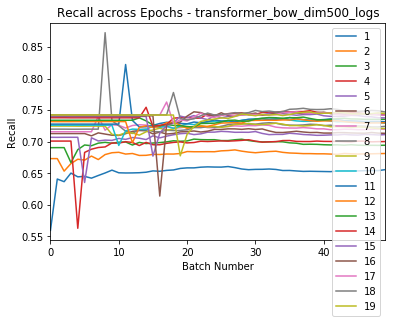

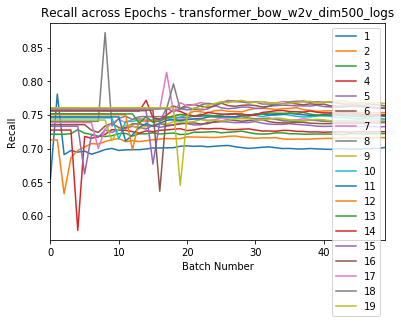

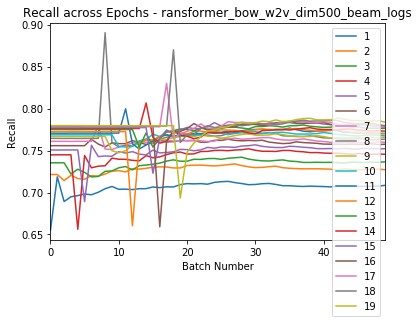

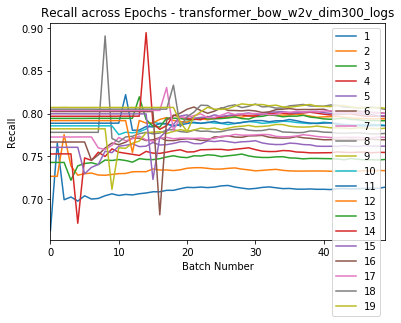

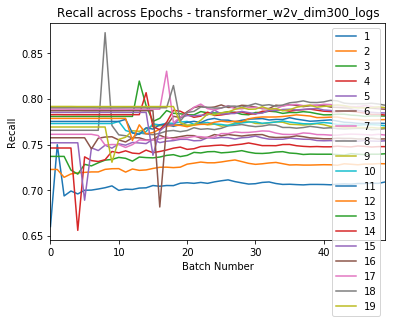

In [256]:
# transformer recall trends

for i in range(len(transformer_paths)):
    file_path, file_title_len = transformer_paths[i], transformer_file_titlelen[i]
    last_epoch_ind = 1000
    window = 50
    recall_df = create_training_metric_df(file_path, recall_confident, last_epoch_ind, window)
    recall_df.drop(columns=[0], inplace=True)
    recall_graph = recall_df.plot()
    recall_graph.set_title("Recall across Epochs - " + file_path[len(file_path) - file_title_len :])
    recall_graph.set_xlabel("Batch Number")
    recall_graph.set_ylabel("Recall")

In [257]:
# precision-recall graph
# Note: arranged in the order of: [baseline, transformer_bow, transformer_bow_w2v, transformer_bow_w2v_beam, transformer_bow_w2v_residual, transformer_bow_w2v_dim300, transformer_w2v_dim300]

all_precisions = [0.4594, 0.4354, 0.4145, 0.4128, 0.4256, 0.4415, 0.4516]
all_recalls = [0.7901, 0.7421, 0.7593, 0.7690, 0.7710, 0.7919, 0.7732]

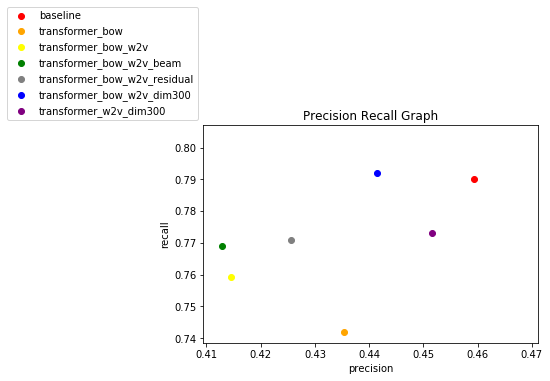

In [274]:
labels = ("baseline", "transformer_bow", "transformer_bow_w2v", "transformer_bow_w2v_beam", "transformer_bow_w2v_residual", "transformer_bow_w2v_dim300", "transformer_w2v_dim300")
colors = ["red", "orange", "yellow", "green", "grey", "blue", "purple"]
for a, b, c, d in zip(all_precisions, all_recalls, labels, colors):
    plt.scatter(a, b, label=c, color=d)
plt.title('Precision Recall Graph')
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(bbox_to_anchor=(0, 1), loc='lower right', ncol=1)
plt.show()

In [142]:
# constants
TASKMASTER_DATA_URL = "https://github.com/google-research-datasets/Taskmaster/tree/master/TM-2-2020/data"
TASKMASTER_SCHEMA_URL = "https://github.com/google-research-datasets/Taskmaster/tree/master/TM-2-2020/ontology"
TASKMASTER_TARGET_PATH = "/Users/weiwzhang/arena/dialog_paraphrase/datasets/taskmaster/"

QUORA_TRAIN_PATH = "/Users/weiwzhang/arena/dialog_paraphrase/datasets/quora/train.csv"
# QUORA_TEST_PATH = "/Users/weiwzhang/arena/dialog_paraphrase/datasets/quora/test.csv"

MSRP_TRAIN_PATH = "/Users/weiwzhang/arena/dialog_paraphrase/datasets/MSRP/MRPC/train_temp.csv"
# MSRP_TEST_PATH = "/Users/weiwzhang/arena/dialog_paraphrase/datasets/MSRP/msr_paraphrase_test_raw.txt"

VOCAB_OCCURENCE_THRESHOLD = 5

In [85]:
# util functions
def calculate_sentence_length(sentence_sets):
    stop_words = set(stopwords.words('english'))
    
    sentence_lens = []
    sentence_bow_len = []
    paraphrase_bow_len = []
    for st in sentence_sets:
        sentence_lens.extend([len(s) for s in st])
        st_bow = set()
        for s in st:
            s_ = set(s) - stop_words
            sentence_bow_len.append(len(s_))
            st_bow |= s_
        paraphrase_bow_len.append(len(st_bow))
    
    sentence_len_percentile = np.percentile(sentence_lens, [80, 90, 95])
    print("sentence length at 80 percentile:", sentence_len_percentile[0], 
          ", at 90 percentile:", sentence_len_percentile[1], 
          ", at 95 percentile: ",sentence_len_percentile[2])
    sentence_bow_percentile = np.percentile(sentence_bow_len, [80, 90, 95])
    print("sentence BOW size at 80 percentile:", sentence_bow_percentile[0], 
          ", at 90 percentile:", sentence_bow_percentile[1], 
          ", at 95 percentile: ",sentence_bow_percentile[2])
    paraphrase_bow_percentile = np.percentile(paraphrase_bow_len, [80, 90, 95])
    print("paraphrase BOW size at 80 percentile:", paraphrase_bow_percentile[0], 
          ", at 90 percentile:", paraphrase_bow_percentile[1], 
          ", at 95 percentile: ",paraphrase_bow_percentile[2])

    return [sentence_len_percentile, sentence_bow_percentile, paraphrase_bow_percentile]

def calculate_vocab_dict(sentence_sets, vocab_size_threshold = VOCAB_OCCURENCE_THRESHOLD):
    vocab = []
    for st in sentence_sets:
        for s in st:
            vocab.extend(s)
    vocab = Counter(vocab)
    print("vocabulary size: %d" % len(vocab))
    vocab_truncate = [w for w in vocab if vocab[w] >= vocab_size_threshold]
    print("vocabulary size, occurance >= 5: %d" % len(vocab_truncate))
    return vocab_truncate


## Quora Dataset

In [127]:
# load dataset
train_quora = pd.read_csv(QUORA_TRAIN_PATH)
print(train_quora.shape)
train_quora.head(5)

(404290, 6)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### 1. analyze data and remove null

In [128]:
quora_nan_data_points = train_quora[train_quora.isnull().any(axis=1)]
quora_nan_data_points

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


**Seems like 174363 and 303951 can be paired up to another data point**

In [129]:
train_quora.loc[105780, 'question2'] = train_quora.loc[201841, 'question1']
train_quora.loc[105780, 'qid2'] = train_quora.loc[201841, 'qid1']
train_quora.loc[105780, 'is_duplicate'] = 1
train_quora.dropna(inplace = True)
print(train_quora.shape)

(404288, 6)


### 2. get data distributions

In [44]:
# paraphrase vs. not
para_distribution = train_quora['is_duplicate'].value_counts()
print(para_distribution)
print("Quora data set has %d paraphrase", para_distribution[1] / sum(para_distribution))

0    255024
1    149264
Name: is_duplicate, dtype: int64
Quora data set has %d paraphrase 0.3692021529206902


In [46]:
# get word tokens
train_quora['q1_tokens'] = [word_tokenize(q1) for q1 in train_quora['question1']]
train_quora['q2_tokens'] = [word_tokenize(q2) for q2 in train_quora['question2']]
train_quora.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_tokens,q2_tokens
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[What, is, the, step, by, step, guide, to, inv...","[What, is, the, step, by, step, guide, to, inv..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[What, is, the, story, of, Kohinoor, (, Koh-i-...","[What, would, happen, if, the, Indian, governm..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[How, can, I, increase, the, speed, of, my, in...","[How, can, Internet, speed, be, increased, by,..."
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[Why, am, I, mentally, very, lonely, ?, How, c...","[Find, the, remainder, when, [, math, ], 23^, ..."
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[Which, one, dissolve, in, water, quikly, suga...","[Which, fish, would, survive, in, salt, water, ?]"


In [88]:
# get sentence lengths statistics
paraphrase_sentence_set = np.vstack((train_quora['q1_tokens'], train_quora['q2_tokens'])).T
quora_sentence_lens = calculate_sentence_length(paraphrase_sentence_set)
quora_vocab_dict = calculate_vocab_dict(paraphrase_sentence_set)

sentence length at 80 percentile: 16.0 , at 90 percentile: 21.0 , at 95 percentile:  26.0
sentence BOW size at 80 percentile: 10.0 , at 90 percentile: 12.0 , at 95 percentile:  15.0
paraphrase BOW size at 80 percentile: 16.0 , at 90 percentile: 20.0 , at 95 percentile:  23.0
vocabulary size: 136865
vocabulary size, occurance >= 5: 37117


## Microsoft Research Paraphrase Corpus (MSRP)

In [146]:
train_MSRP = pd.read_csv(MSRP_TRAIN_PATH, header=0)
train_MSRP.head(10)

/Users/weiwzhang/arena/dialog_paraphrase/datasets/MSRP/MRPC/train_temp.csv


train
Quality #1 ID   #2 ID   #1 String                                          #2 String                                            NaN
1       702876  702977  Amrozi accused his brother, whom he called "the... Referring to him as only "the witness", Amrozi ...   NaN
0       2108705 2108831 Yucaipa owned Dominick's before selling the cha... Yucaipa bought Dominick's in 1995 for $693 mill...   NaN
1       1330381 1330521 They had published an advertisement on the Inte... On June 10, the ship's owners had published an ...   NaN
0       3344667 3344648 Around 0335 GMT, Tab shares were up 19 cents, o... Tab shares jumped 20 cents, or 4.6%, to set a r...   NaN
1       1236820 1236712 The stock rose $2.11, or about 11 percent, to c... PG&E Corp. shares jumped $1.63 or 8 percent to ...   NaN
        738533  737951  Revenue in the first quarter of the year droppe... With the scandal hanging over Stewart's company...   NaN
0       264589  264502  The Nasdaq had a weekly gain of 17.27, or 1.2 p... The tech-laced Nasdaq Composite .IXIC rallied 3...   NaN
1       579975  579810  The DVD-CCA then appealed to the state Supreme ... The DVD CCA appealed that decision to the U.S. ...   NaN
0       3114205 3114194 That compared with $35.18 million, or 24 cents ... Earnings were affected by a non-recurring $8 mi...   NaN

In [147]:
train_MSRP.shape

(3964, 1)

#### MSRP data corpus is malformatted after converting from .msi on Mac OS. Will need to hand fix data points. 

### Appendix

In [148]:
# MSRP raw txt processing. Credit to GLEU Baseline https://github.com/nyu-mll/GLUE-baselines
import os
import sys
import shutil
import argparse
import tempfile
import io
import zipfile
    
def format_mrpc(data_dir, path_to_data):
    print("Processing MRPC...")
    mrpc_dir = os.path.join(data_dir, "MRPC")
    if not os.path.isdir(mrpc_dir):
        os.mkdir(mrpc_dir)
    mrpc_train_file = os.path.join(path_to_data, "msr_paraphrase_train_raw.txt")
    mrpc_test_file = os.path.join(path_to_data, "msr_paraphrase_test_raw.txt")
    assert os.path.isfile(mrpc_train_file), "Train data not found at %s" % mrpc_train_file
    assert os.path.isfile(mrpc_test_file), "Test data not found at %s" % mrpc_test_file
    
    with io.open(mrpc_train_file, encoding='utf-8') as data_fh, \
         io.open(os.path.join(mrpc_dir, "train.tsv"), 'w', encoding='utf-8') as train_fh:
        header = data_fh.readline()
        train_fh.write(header)
        for row in data_fh:
            label, id1, id2, s1, s2 = row.strip().split('\t')
            train_fh.write("%s\t%s\t%s\t%s\t%s\n" % (label, id1, id2, s1, s2))

    with io.open(mrpc_test_file, encoding='utf-8') as data_fh, \
            io.open(os.path.join(mrpc_dir, "test.tsv"), 'w', encoding='utf-8') as test_fh:
        header = data_fh.readline()
        test_fh.write("index\t#1 ID\t#2 ID\t#1 String\t#2 String\n")
        for idx, row in enumerate(data_fh):
            label, id1, id2, s1, s2 = row.strip().split('\t')
            test_fh.write("%d\t%s\t%s\t%s\t%s\n" % (idx, id1, id2, s1, s2))
    print("\tCompleted!")
